In [1]:
import autograd.numpy as np
import autograd.scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0, './../')

import interpolation_lib as interp

In [2]:
# knot_vector = np.array([0.0, 0.2, 0.4, 0.6, 0.7, 0.75, 0.8, 0.85, 0.90, 0.95, 1.0])
knot_vector = np.linspace(0.0, 1.0, 10)

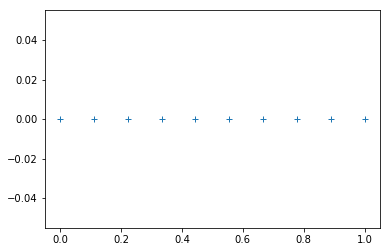

In [3]:
plt.plot(knot_vector, np.zeros(len(knot_vector)), '+')

In [4]:
bsplines = interp.Bspline(knot_vector)

In [5]:
x = np.linspace(0.01, 0.99, 100)

# Check zeroth order splines

In [6]:
zeroth_order_bases = bsplines._get_zeroth_basis(x)
zeroth_order_bases_at_knots = bsplines._get_zeroth_basis(knot_vector)

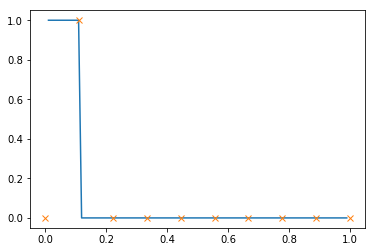

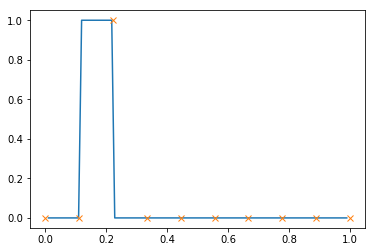

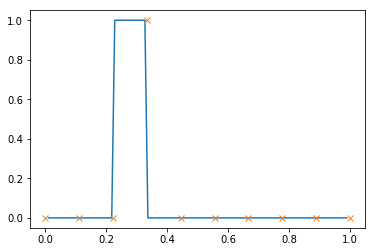

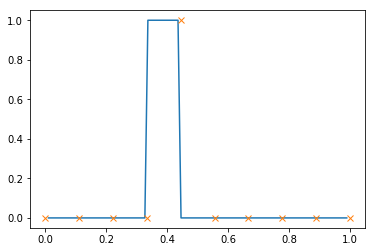

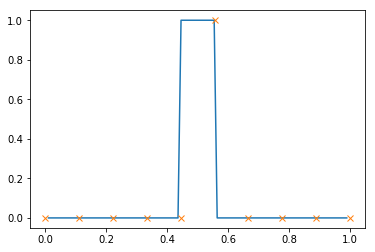

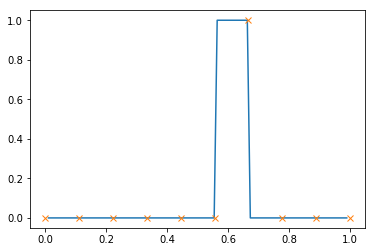

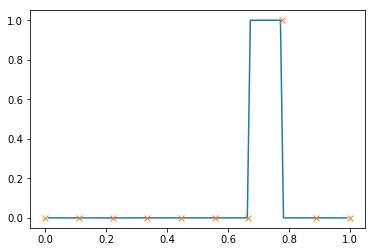

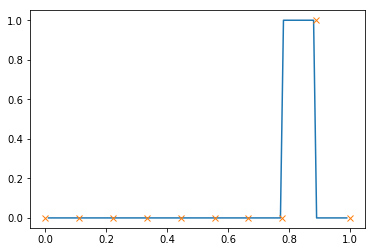

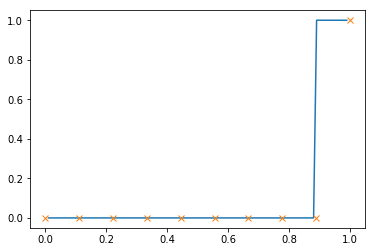

In [7]:
for i in range(np.shape(zeroth_order_bases)[0]): 
    plt.figure()
    plt.plot(x, zeroth_order_bases.T[:, i]); 
    plt.plot(knot_vector, zeroth_order_bases_at_knots.T[:, i], 'x'); 

# Higher order

In [8]:
bspline_bases = bsplines.get_pth_order_basis(x, 5)
bspline_bases_at_knots = bsplines.get_pth_order_basis(knot_vector, 5)

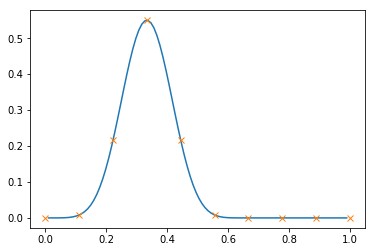

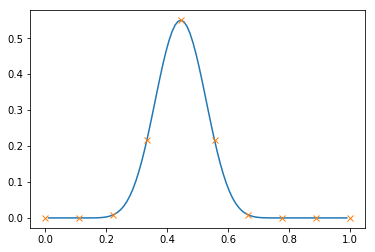

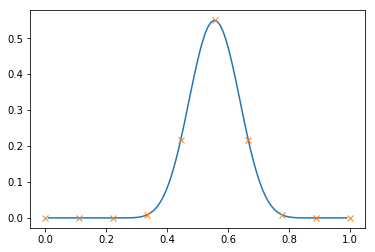

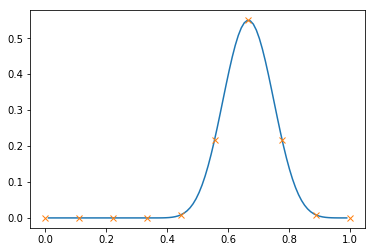

In [9]:
for i in range(np.shape(bspline_bases)[0]): 
    plt.figure()
    plt.plot(x, bspline_bases.T[:, i]); 
    plt.plot(knot_vector, bspline_bases_at_knots.T[:, i], 'x'); 

In [10]:
fun = lambda x : sp.stats.norm.pdf(x, 0.7, 0.1) - 1.5 * sp.stats.norm.pdf(x, 0.75, 0.1)

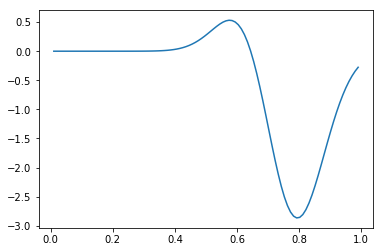

In [11]:
plt.plot(x, fun(x))

In [ ]:
knot_vector = np.linspace(0.0, 1.0, 1000)

In [ ]:
bspline_regression = interp.BsplineRegression(fun, knot_vector, knot_vector, 3)

In [ ]:
plt.plot(x, fun(x)); 
plt.plot(x, bspline_regression.eval_interp_fun(x)); 

In [ ]:
np.max(np.abs(fun(x) -  bspline_regression.eval_interp_fun(x)))

In [ ]:
from autograd import elementwise_grad

In [ ]:
x = np.random.random(1000)

In [19]:
bspline_grad_ad = elementwise_grad(bspline_regression.eval_interp_fun)

In [20]:
bspline_grad_fin_diff = \
    (bspline_regression.eval_interp_fun(x + 1e-10) - bspline_regression.eval_interp_fun(x)) / 1e-10

In [21]:
print(np.max(np.abs(bspline_grad_ad(x) - bspline_grad_fin_diff)))

1.2752707213792291e-05


In [22]:
import scipy as osp

In [62]:
c = np.zeros(np.shape(bspline_bases)[0])
c[3] = 1
basis = osp.interpolate.BSpline(knot_vector, c, 3, False)

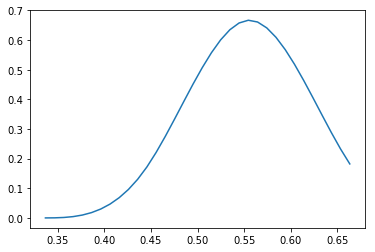

In [63]:
x = np.linspace(0.01, 0.99, 100)
plt.plot(x, basis(x))